In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [11]:
skills = ["Python", "Java", "C++", "Javascript", "SQL"]
students = ["Alice", "Danuja", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Ivan", "Judy", "Karl", "Lily",
                "Mike", "Nancy", "Oscar", "Peggy", "Quinn", "Ralph"]

G = nx.Graph()
G.add_nodes_from(skills, bipartite=0)
G.add_nodes_from(students, bipartite=1)

skill_levels = {
        "Alice": {"Python": 5, "Java": 4, "C++": 3, "Javascript": 2, "SQL": 1},
        "Danuja": {"Python": 4, "Java": 3, "C++": 2, "Javascript": 1, "SQL": 5},
        "Charlie": {"Python": 3, "Java": 2, "C++": 1, "Javascript": 5, "SQL": 4},
        "David": {"Python": 2, "Java": 1},
        "Eve": {"Python": 1, "Java": 5, "C++": 4, "Javascript": 3},
        "Frank": {"Python": 5, "C++": 4, "SQL": 3},
        "Grace": {"Java": 5, "Javascript": 4},
        "Hannah": {"SQL": 5},
        "Ivan": {"C++": 5},
        "Judy": {"Javascript": 5},
        "Karl": {"Java": 5, "C++": 4, "Javascript": 3, "SQL": 2},
        "Lily": {"Java": 4, "C++": 3, "Javascript": 2, "SQL": 1},
        "Mike": {"SQL": 4, "Javascript": 3, "C++": 2, "Java": 1},
        "Nancy": {"C++": 5, "Java": 4, "SQL": 3},
        "Oscar": {"Python": 5, "SQL": 4},
        "Peggy": {"Javascript": 5, "SQL": 4},
        "Quinn": {"Java": 5, "C++": 4},
        "Ralph": {"Python": 5, "Java": 4, "C++": 3, "Javascript": 2, "SQL": 1},
    }


In [30]:
collaboration_potential = {}

for student, skills in skill_levels.items():
        # print(student)
    for skill, point in skills.items():
        # print(skill,point)
        if student not in collaboration_potential:
            collaboration_potential[student] = {}
            if skill not in collaboration_potential[student]:
                collaboration_potential[student][skill] = 10 - point
        else:
            if skill not in collaboration_potential[student]:
                collaboration_potential[student][skill] = 10 - point

for student, skills in collaboration_potential.items():
    for skill, point in skills.items():
        G.add_edge(student, skill, capacity=float(point), weight=(skill_levels[student][skill]) / 10)

#add dummy edges to make the graph bipartite represent the collaboration 

G.add_edge("Alice", "Bob",weights= 0.1)
G.add_edge("Alice", "Charlie",weights= 0.5)
G.add_edge("Alice", "David",weights= 0.3)
G.add_edge("Alice", "Eve",weights= 0.4)
G.add_edge("Alice", "Frank",weights= 0.9)
G.add_edge("Alice", "Ralph",weights= 0.4)
G.add_edge("Lily", "Karl",weights=0.7)
G.add_edge("Lily", "Grace",weights= 0.2)
G.add_edge("Judy", "Mike",weights= 0.8)
G.add_edge("Judy", "Hannah",weights= 0.6)
G.add_edge("Judy", "Peggy",weights= 0.3)
G.add_edge("Judy", "Oscar",weights= 0.6)
G.add_edge("Judy", "Ivan",weights= 0.8)
G.add_edge("Judy", "Quinn",weights= 0.5)



In [31]:
# weights = {(u,v): random.uniform(0, 1) for u, v in G.edges()}
# weights

In [32]:
# nx.set_edge_attributes(G, weights, 'weight')

In [33]:
for node in G.edges(data=True):
    print(node)

('Python', 'Alice', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Danuja', {'capacity': 6.0, 'weight': 0.4})
('Python', 'Charlie', {'capacity': 7.0, 'weight': 0.3})
('Python', 'David', {'capacity': 8.0, 'weight': 0.2})
('Python', 'Eve', {'capacity': 9.0, 'weight': 0.1})
('Python', 'Frank', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Oscar', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Ralph', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Alice', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Danuja', {'capacity': 7.0, 'weight': 0.3})
('Java', 'Charlie', {'capacity': 8.0, 'weight': 0.2})
('Java', 'David', {'capacity': 9.0, 'weight': 0.1})
('Java', 'Eve', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Grace', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Karl', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Lily', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Mike', {'capacity': 9.0, 'weight': 0.1})
('Java', 'Nancy', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Quinn', {'capacity': 5.0, 'weight': 0.5

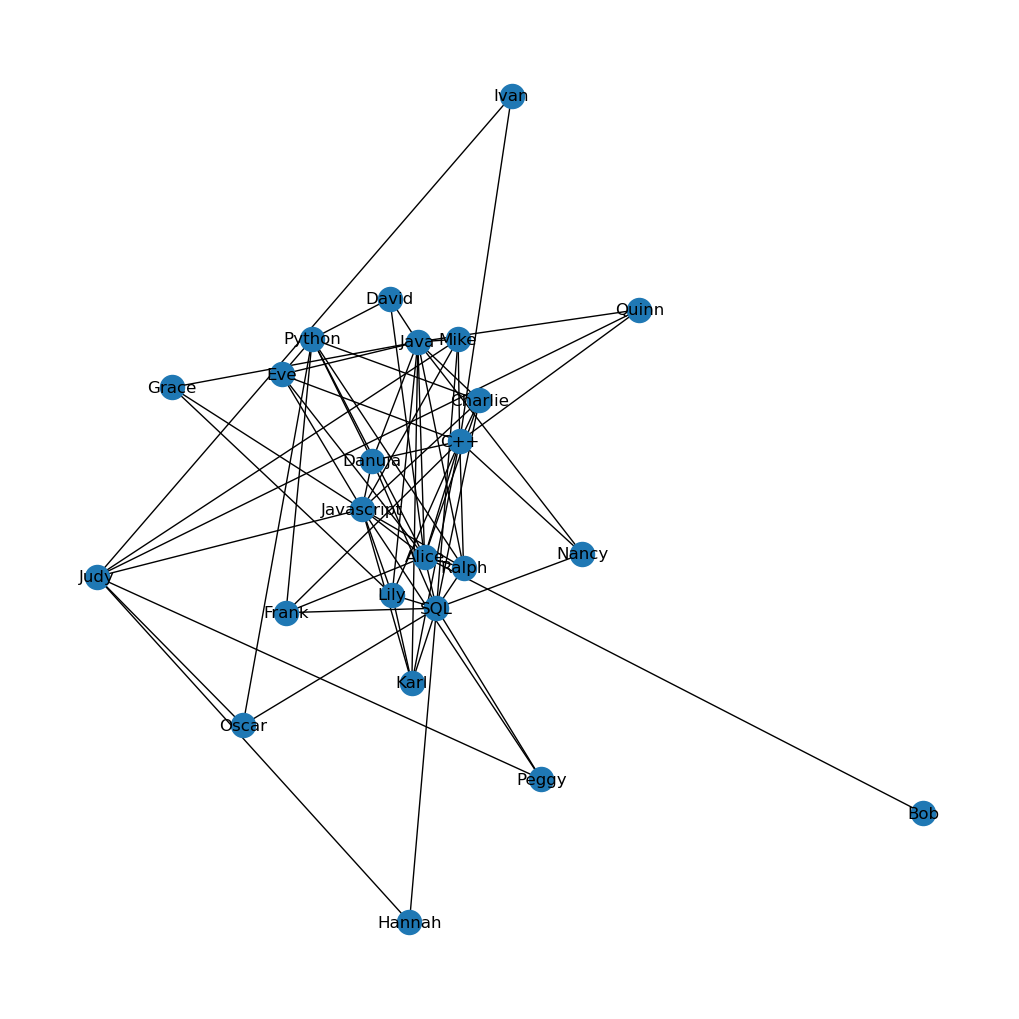

In [34]:


# Add edges between students and students
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True,pos = pos)

In [35]:
from networkx.algorithms.flow import shortest_augmenting_path

In [36]:
flow_value, flow_dict = nx.maximum_flow(G, "Mike","SQL" , capacity='capacity')

In [37]:
flow_value

78.0

In [38]:
flow_value, flow_dict = nx.maximum_flow(G, "Charlie","SQL" , capacity='capacity')

In [39]:
flow_value

83.0

In [40]:
# capacities = [G[u][v]['capacity'] for u, v in G.edges()]

In [41]:
# weights = [G[u][v]['weight'] for u, v in G.edges()]

In [42]:
flow_dict

{'Python': {'Alice': 5.0,
  'Danuja': 6.0,
  'Charlie': 7.0,
  'David': 0,
  'Eve': 0,
  'Frank': 0,
  'Oscar': 5.0,
  'Ralph': 0},
 'Java': {'Alice': 0,
  'Danuja': 7.0,
  'Charlie': 8.0,
  'David': 0,
  'Eve': 0,
  'Grace': 5.0,
  'Karl': 5.0,
  'Lily': 0,
  'Mike': 0,
  'Nancy': 2.0,
  'Quinn': 5.0,
  'Ralph': 0},
 'C++': {'Alice': 2.0,
  'Danuja': 0,
  'Charlie': 9.0,
  'Eve': 0,
  'Frank': 0,
  'Ivan': 0,
  'Karl': 3.0,
  'Lily': 0,
  'Mike': 8.0,
  'Nancy': 5.0,
  'Quinn': 6.0,
  'Ralph': 0},
 'Javascript': {'Alice': 0,
  'Danuja': 0,
  'Charlie': 5.0,
  'Eve': 0,
  'Grace': 0,
  'Judy': 0,
  'Karl': 7.0,
  'Lily': 8.0,
  'Mike': 7.0,
  'Peggy': 5.0,
  'Ralph': 0},
 'SQL': {'Alice': 0,
  'Danuja': 0,
  'Charlie': 0,
  'Frank': 0,
  'Hannah': 0,
  'Karl': 0,
  'Lily': 0,
  'Mike': 0,
  'Nancy': 0,
  'Oscar': 0,
  'Peggy': 0,
  'Ralph': 0},
 'Alice': {'Bob': 0,
  'Charlie': 0,
  'David': 13.0,
  'Eve': 27.0,
  'Frank': 18.0,
  'Ralph': 35.0,
  'Python': 0,
  'Java': 3.0,
  'C++': 0

In [43]:
G.degree

DegreeView({'Python': 8, 'Java': 12, 'C++': 12, 'Javascript': 11, 'SQL': 12, 'Alice': 11, 'Danuja': 5, 'Charlie': 6, 'David': 3, 'Eve': 5, 'Frank': 4, 'Grace': 3, 'Hannah': 2, 'Ivan': 2, 'Judy': 7, 'Karl': 5, 'Lily': 6, 'Mike': 5, 'Nancy': 3, 'Oscar': 3, 'Peggy': 3, 'Quinn': 3, 'Ralph': 6, 'Bob': 1})

In [44]:
from community import community_louvain

In [45]:
['red' if node in skills else 'None' for node in G.nodes ]

['red',
 'red',
 'red',
 'red',
 'red',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None']

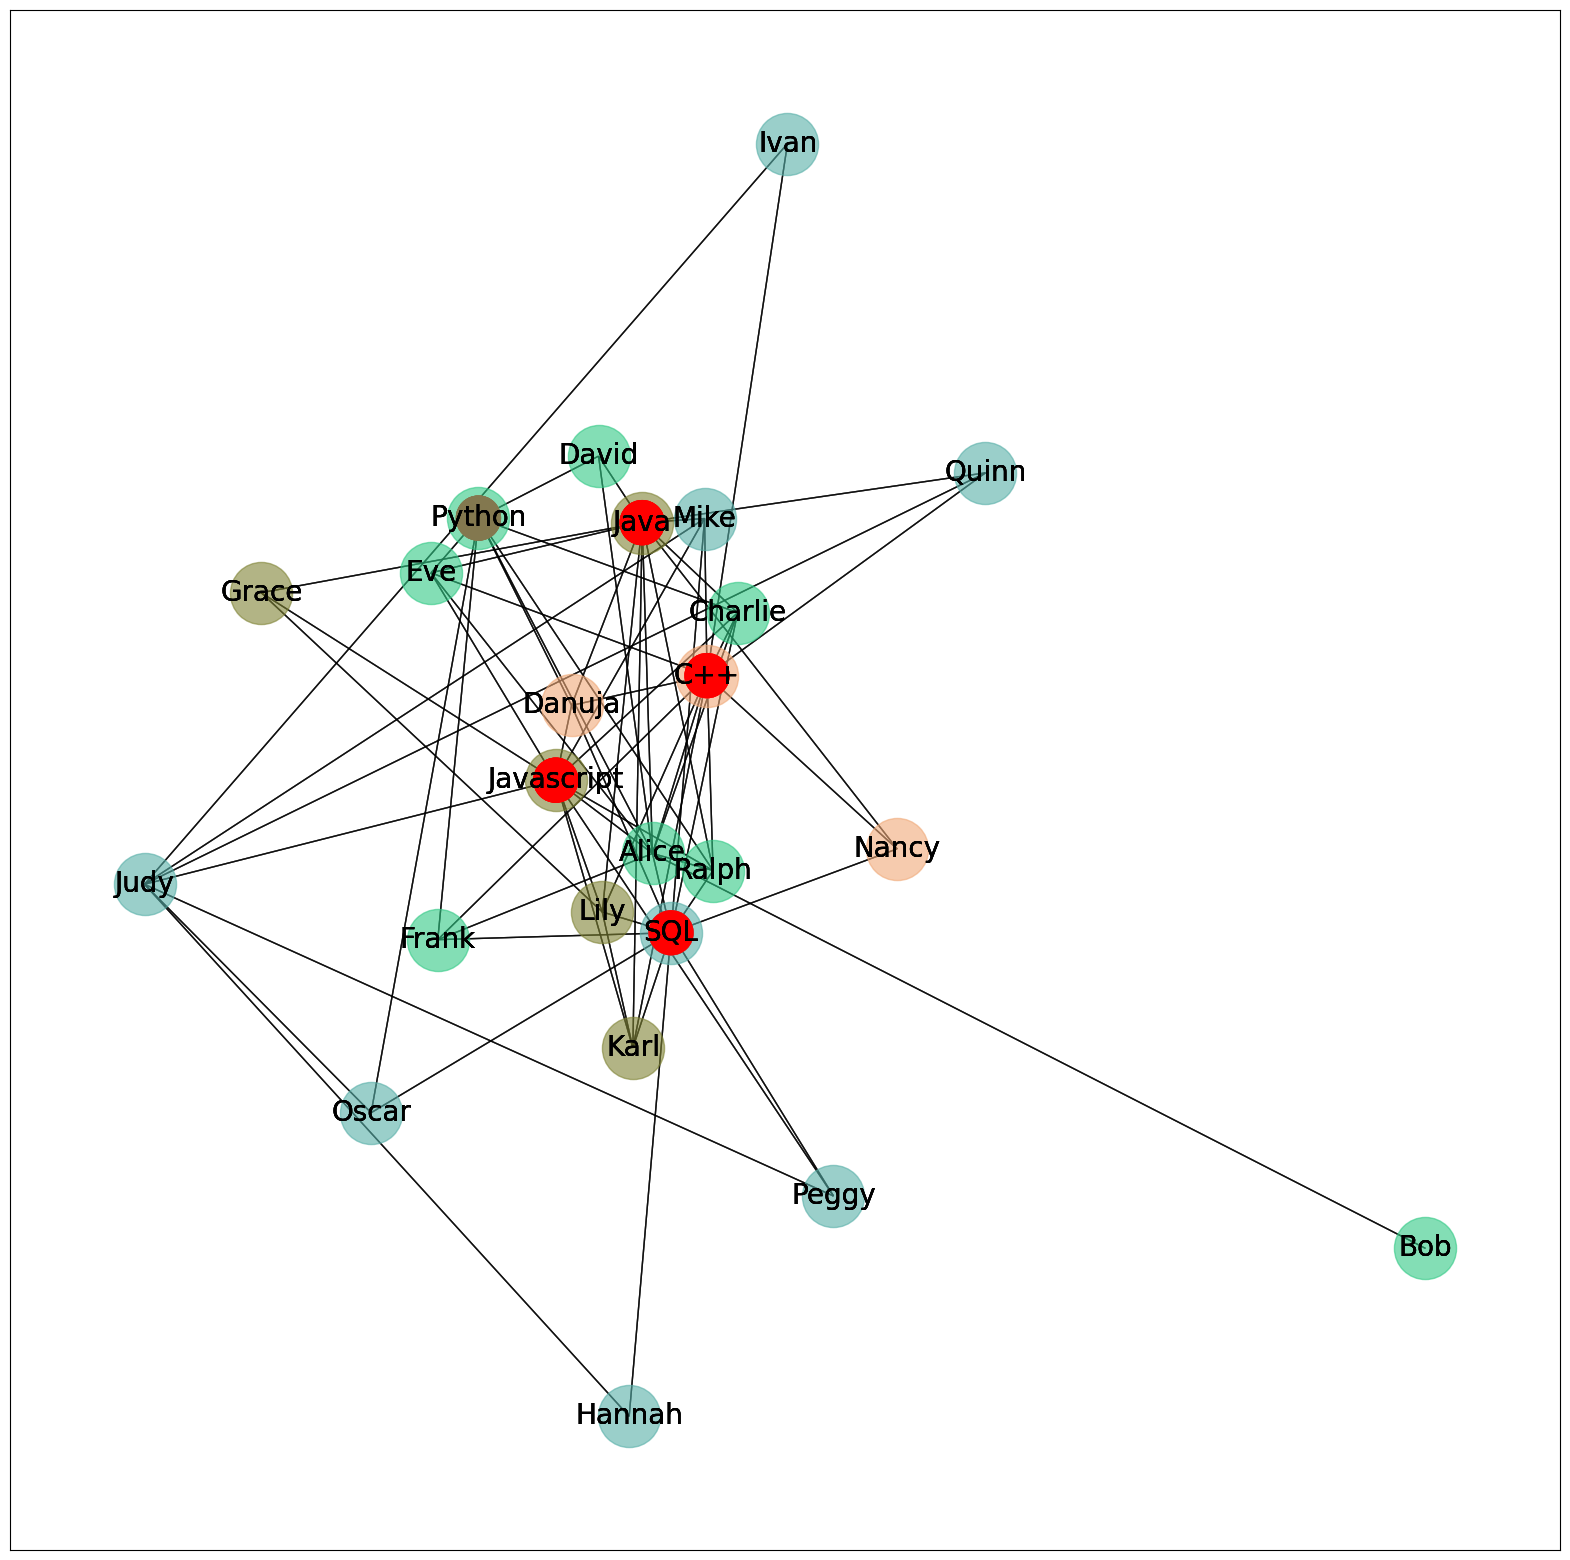

In [46]:
communities = community_louvain.best_partition(G)
# Draw the graph
pos = nx.spring_layout(G)

# Create a list of colors for each community
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(communities.values()))]

plt.figure(figsize=(20,20))

# Draw the nodes colored by community
for com in set(communities.values()):
    list_nodes = [nodes for nodes in communities.keys() if communities[nodes] == com]
    
    pos = nx.kamada_kawai_layout(G)
    #nx.draw_networkx_nodes(G, pos, nodelist=list_nodes, node_color = colors[com], node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G,pos,nodelist=[node for node in G.nodes if node in skills], node_color = ['red'  for node in G.nodes if node in skills], node_size=1000, alpha=1)
    nx.draw_networkx_nodes(G,pos,nodelist=list_nodes, node_color = colors[com], node_size=2000, alpha=0.6)
    nx.draw_networkx_edges(G,pos, alpha=0.5)
    # nx.draw(G,pos,nodelist=list_nodes, node_color = ['red' if node in skills else 'None' for node in G.nodes ], node_size=2000, alpha=0.5, with_labels=True)
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')


In [47]:
communities

{'Python': 3,
 'Java': 0,
 'C++': 1,
 'Javascript': 0,
 'SQL': 2,
 'Alice': 3,
 'Danuja': 1,
 'Charlie': 3,
 'David': 3,
 'Eve': 3,
 'Frank': 3,
 'Grace': 0,
 'Hannah': 2,
 'Ivan': 2,
 'Judy': 2,
 'Karl': 0,
 'Lily': 0,
 'Mike': 2,
 'Nancy': 1,
 'Oscar': 2,
 'Peggy': 2,
 'Quinn': 2,
 'Ralph': 3,
 'Bob': 3}

In [48]:
nx.set_node_attributes(G, communities, 'group')

In [49]:
# from pyvis.network import Network
# net = Network(notebook=True, height="1000px", width="100%", bgcolor="#222222", font_color="white")

# node_degree = dict(G.degree)

# nx.set_node_attributes(G, node_degree, 'size')

# net.from_nx(G)
# net.show("graph.html")

In [50]:
for node in G.nodes(data=True):
    print(node)

('Python', {'bipartite': 0, 'group': 3})
('Java', {'bipartite': 0, 'group': 0})
('C++', {'bipartite': 0, 'group': 1})
('Javascript', {'bipartite': 0, 'group': 0})
('SQL', {'bipartite': 0, 'group': 2})
('Alice', {'bipartite': 1, 'group': 3})
('Danuja', {'bipartite': 1, 'group': 1})
('Charlie', {'bipartite': 1, 'group': 3})
('David', {'bipartite': 1, 'group': 3})
('Eve', {'bipartite': 1, 'group': 3})
('Frank', {'bipartite': 1, 'group': 3})
('Grace', {'bipartite': 1, 'group': 0})
('Hannah', {'bipartite': 1, 'group': 2})
('Ivan', {'bipartite': 1, 'group': 2})
('Judy', {'bipartite': 1, 'group': 2})
('Karl', {'bipartite': 1, 'group': 0})
('Lily', {'bipartite': 1, 'group': 0})
('Mike', {'bipartite': 1, 'group': 2})
('Nancy', {'bipartite': 1, 'group': 1})
('Oscar', {'bipartite': 1, 'group': 2})
('Peggy', {'bipartite': 1, 'group': 2})
('Quinn', {'bipartite': 1, 'group': 2})
('Ralph', {'bipartite': 1, 'group': 3})
('Bob', {'group': 3})


In [51]:
for edge in G.edges(data=True):
    print(edge)

('Python', 'Alice', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Danuja', {'capacity': 6.0, 'weight': 0.4})
('Python', 'Charlie', {'capacity': 7.0, 'weight': 0.3})
('Python', 'David', {'capacity': 8.0, 'weight': 0.2})
('Python', 'Eve', {'capacity': 9.0, 'weight': 0.1})
('Python', 'Frank', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Oscar', {'capacity': 5.0, 'weight': 0.5})
('Python', 'Ralph', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Alice', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Danuja', {'capacity': 7.0, 'weight': 0.3})
('Java', 'Charlie', {'capacity': 8.0, 'weight': 0.2})
('Java', 'David', {'capacity': 9.0, 'weight': 0.1})
('Java', 'Eve', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Grace', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Karl', {'capacity': 5.0, 'weight': 0.5})
('Java', 'Lily', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Mike', {'capacity': 9.0, 'weight': 0.1})
('Java', 'Nancy', {'capacity': 6.0, 'weight': 0.4})
('Java', 'Quinn', {'capacity': 5.0, 'weight': 0.5

In [52]:
edges_list = [i for i in G.edges(data=True)]
edges_list

[('Python', 'Alice', {'capacity': 5.0, 'weight': 0.5}),
 ('Python', 'Danuja', {'capacity': 6.0, 'weight': 0.4}),
 ('Python', 'Charlie', {'capacity': 7.0, 'weight': 0.3}),
 ('Python', 'David', {'capacity': 8.0, 'weight': 0.2}),
 ('Python', 'Eve', {'capacity': 9.0, 'weight': 0.1}),
 ('Python', 'Frank', {'capacity': 5.0, 'weight': 0.5}),
 ('Python', 'Oscar', {'capacity': 5.0, 'weight': 0.5}),
 ('Python', 'Ralph', {'capacity': 5.0, 'weight': 0.5}),
 ('Java', 'Alice', {'capacity': 6.0, 'weight': 0.4}),
 ('Java', 'Danuja', {'capacity': 7.0, 'weight': 0.3}),
 ('Java', 'Charlie', {'capacity': 8.0, 'weight': 0.2}),
 ('Java', 'David', {'capacity': 9.0, 'weight': 0.1}),
 ('Java', 'Eve', {'capacity': 5.0, 'weight': 0.5}),
 ('Java', 'Grace', {'capacity': 5.0, 'weight': 0.5}),
 ('Java', 'Karl', {'capacity': 5.0, 'weight': 0.5}),
 ('Java', 'Lily', {'capacity': 6.0, 'weight': 0.4}),
 ('Java', 'Mike', {'capacity': 9.0, 'weight': 0.1}),
 ('Java', 'Nancy', {'capacity': 6.0, 'weight': 0.4}),
 ('Java', 'Qu

In [53]:
# edges_list.sort(key=lambda x: x[2]['weight'], reverse=True)
# edges_list

# Define complexity

In [54]:
#project 1

project_complexity = {}

project_complexity["Python"] = 2
project_complexity["Javascript"] = 2
project_complexity["SQL"] = 4
project_complexity["C++"] = 5
team_size = 6



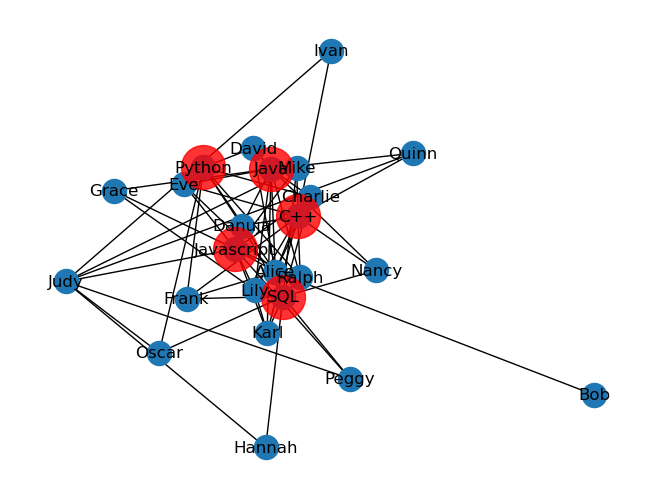

In [55]:
nx.draw(G,pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=skills, node_color = "red", node_size=1000, alpha=0.8)

In [56]:
from pyvis.network import Network
net = Network(notebook=True, height="1000px", width="100%", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
# net.show("graph.html")


In [57]:
team = {}
team_experts = []
under_avg_students = []

In [58]:
for node in G.nodes(data=True):
    print(node)

('Python', {'bipartite': 0, 'group': 3, 'size': 8})
('Java', {'bipartite': 0, 'group': 0, 'size': 12})
('C++', {'bipartite': 0, 'group': 1, 'size': 12})
('Javascript', {'bipartite': 0, 'group': 0, 'size': 11})
('SQL', {'bipartite': 0, 'group': 2, 'size': 12})
('Alice', {'bipartite': 1, 'group': 3, 'size': 11})
('Danuja', {'bipartite': 1, 'group': 1, 'size': 5})
('Charlie', {'bipartite': 1, 'group': 3, 'size': 6})
('David', {'bipartite': 1, 'group': 3, 'size': 3})
('Eve', {'bipartite': 1, 'group': 3, 'size': 5})
('Frank', {'bipartite': 1, 'group': 3, 'size': 4})
('Grace', {'bipartite': 1, 'group': 0, 'size': 3})
('Hannah', {'bipartite': 1, 'group': 2, 'size': 2})
('Ivan', {'bipartite': 1, 'group': 2, 'size': 2})
('Judy', {'bipartite': 1, 'group': 2, 'size': 7})
('Karl', {'bipartite': 1, 'group': 0, 'size': 5})
('Lily', {'bipartite': 1, 'group': 0, 'size': 6})
('Mike', {'bipartite': 1, 'group': 2, 'size': 5})
('Nancy', {'bipartite': 1, 'group': 1, 'size': 3})
('Oscar', {'bipartite': 1, '

In [59]:
for node in project_complexity.keys():
    neighbors = [n for n in G.neighbors(node) if  n not in domain_students]
    print(node," : ",neighbors)

    avg_weight = sum([ G[node][n]['width'] for n in neighbors]) / len(neighbors)
    print(avg_weight)

    temp_flow = {}
    for neighbor in neighbors:
        # print(neighbor," : ",G[node][neighbor]['weight'])
        flow_value, flow_dict = nx.maximum_flow(G, neighbor,node , capacity='capacity')
        # print("flow value = ",flow_value)
        # print("expected complexity = ",project_complexity[node])
        # print("collected skill = ",skill_levels[neighbor])

        temp_flow[neighbor] = flow_value
    print("team flow",temp_flow)
    
    sG = G.subgraph(neighbors)
    nx.draw(sG,pos, with_labels=True)

    under = [n for n in neighbors if G[node][n]['width'] < avg_weight]
    print("Under avg : ",under)

    domain_students = []
    
    conn = True
    sum_project_complexity = 0
    while conn:
        for i in range(len(temp_flow)):
            temp_flow_keys = list(temp_flow.keys())
            if domain_students:
                print("domain students : ",[temp_flow[domain_student] for domain_student in domain_students])
                for domain_student in domain_students:
                    if domain_student in temp_flow_keys:
                        if len(temp_flow_keys) > 1:
                            temp_flow_keys.remove(domain_student)
            print("temp_flow_keys : ",temp_flow_keys)
            max_flow = max(temp_flow_keys)
            print("max-flow : ",max_flow)
            # if len(temp_flow) > 1:
            #     if G[node][temp_flow[max_flow]]['weight'] > avg_weight:
            #         print("student : ",temp_flow[max(temp_flow_keys)])
            #         break
            #     else:
            #         # print("remove : ",temp_flow[max_flow]," : ",max_flow," : ",G[node][temp_flow[max_flow]]['weight']," : ",avg_weight)
            #         del temp_flow[max_flow]
        # print("max-flow : ",temp_flow)
        # print("student : ",temp_flow[max(temp_flow.keys())])

        domain_students.append(max(temp_flow_keys))
        sum_project_complexity = sum([skill_levels[i] for i in domain_students])

        print("sum_project_complexity : ",sum_project_complexity)
        if sum_project_complexity < project_complexity[node]:
            conn = True
        else:
            conn = False

    team[node] = domain_students

        


    
    

    

NameError: name 'domain_students' is not defined

In [34]:
team

{}

In [752]:
team_experts

[]

In [753]:
alltogether_team = []
for k,v in team.items():
    alltogether_team += v

In [754]:
alltogether_team

['Ralph', 'Peggy', 'Mike', 'Hannah', 'Frank', 'Oscar', 'Nancy']

In [755]:
close_centrality = nx.closeness_centrality(G)
close_centrality

{'Python': 0.4583333333333333,
 'Java': 0.4782608695652174,
 'C++': 0.5,
 'Javascript': 0.5238095238095238,
 'SQL': 0.4888888888888889,
 'Alice': 0.5365853658536586,
 'Bob': 0.4782608695652174,
 'Charlie': 0.5238095238095238,
 'David': 0.5238095238095238,
 'Eve': 0.5116279069767442,
 'Frank': 0.41509433962264153,
 'Grace': 0.4074074074074074,
 'Hannah': 0.4074074074074074,
 'Ivan': 0.41509433962264153,
 'Judy': 0.4782608695652174,
 'Karl': 0.3333333333333333,
 'Lily': 0.36065573770491804,
 'Mike': 0.44,
 'Nancy': 0.3384615384615385,
 'Oscar': 0.41509433962264153,
 'Peggy': 0.3793103448275862,
 'Quinn': 0.41509433962264153,
 'Ralph': 0.36065573770491804}

In [756]:
import pandas as pd
closeness_df = pd.DataFrame.from_dict(close_centrality, orient='index', columns=['closeness'])
closeness_df.drop(skills, inplace=True)
closeness_df.sort_values(by=['closeness'], ascending=False,inplace=True)

<AxesSubplot: >

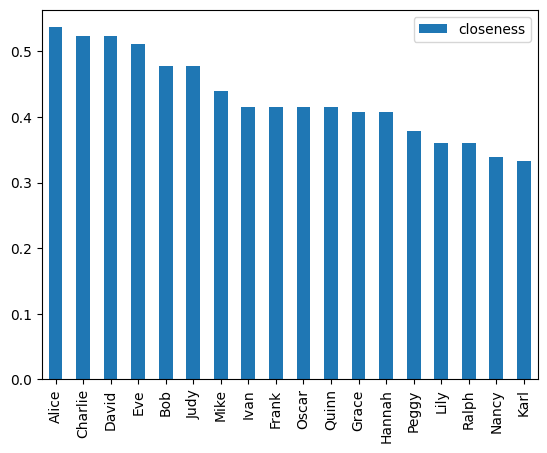

In [757]:
closeness_df.plot(kind='bar')

In [758]:
closeness_df.head()

,closeness
Alice,0.536585
Charlie,0.523810
David,0.523810
Eve,0.511628
Bob,0.478261


In [759]:
messure = {}
for name in alltogether_team:
    l = closeness_df.index == name
    for i in range(len(l)):
        if l[i]:

            messure[name] = closeness_df.iloc[i,0]

In [760]:
messure

{'Ralph': 0.36065573770491804,
 'Peggy': 0.3793103448275862,
 'Mike': 0.44,
 'Hannah': 0.4074074074074074,
 'Frank': 0.41509433962264153,
 'Oscar': 0.41509433962264153,
 'Nancy': 0.3384615384615385}

In [761]:
val = list(messure.values())
val.sort(reverse=True)
print(val)

[0.44, 0.41509433962264153, 0.41509433962264153, 0.4074074074074074, 0.3793103448275862, 0.36065573770491804, 0.3384615384615385]


In [766]:
team_experts = [k for k,v in messure.items() if v in val[:2]]

In [767]:
team_experts

['Mike', 'Frank', 'Oscar']